# Análisis de Series Temporales

In [3]:
import matplotlib
import statsmodels.api as sm
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


## Datos de ventas

In [4]:
df = pd.read_excel("Superstore2.xlsx")
furniture = df.loc[df['Category'] == 'Furniture']

# Rango

print(furniture['Order Date'].min(), furniture['Order Date'].max())

# Preprocesado
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
# furniture.isnull().sum()

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')


2014-01-01 00:00:00 2017-12-31 00:00:00


In [5]:
display(furniture)

,Sales
Order Date,
2014-01-01,113.6700
2014-01-03,1960.8225
2014-01-04,1686.7000
2014-01-05,48.7800
2014-01-06,324.4500
...,...
2017-12-27,2815.0026
2017-12-28,224.7000
2017-12-29,9109.4028


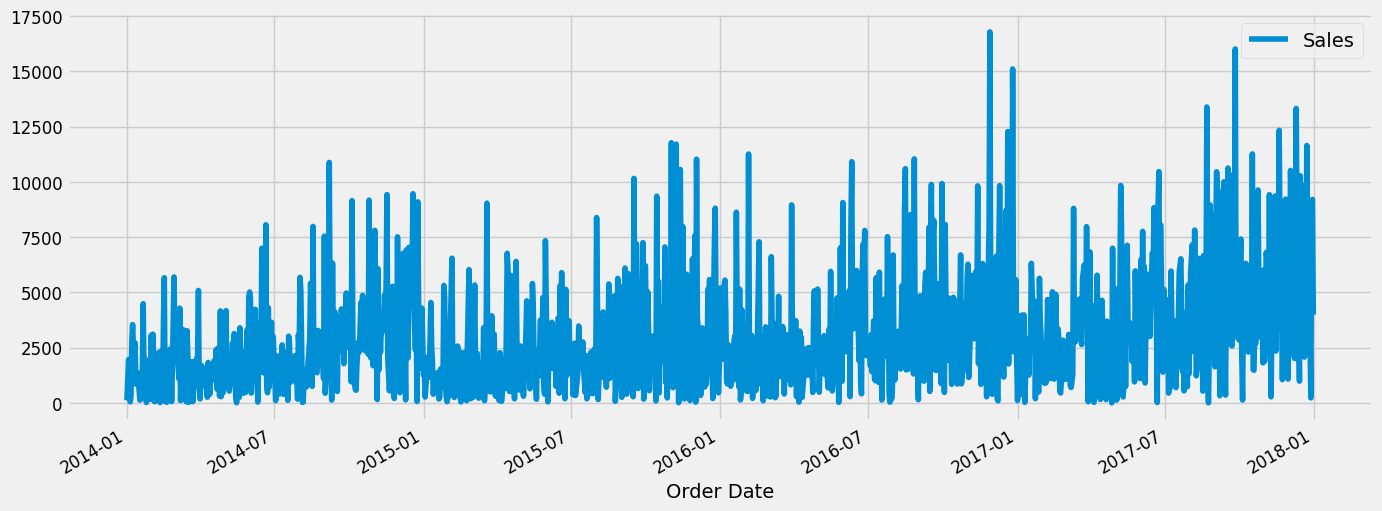

In [6]:
furniture.plot(figsize=(15, 6))
plt.show()

In [7]:
# Datos mensuales, fecha del último día del mes
y = furniture['Sales'].resample('M').mean()

In [8]:
display(y)

Order Date
2014-01-31    1325.528962
2014-02-28    1556.495109
2014-03-31    1678.219783
2014-04-30    1278.731046
2014-05-31    1777.452571
2014-06-30    2640.850083
2014-07-31    1364.476639
2014-08-31    2428.585846
2014-09-30    3354.774418
2014-10-31    3163.771044
2014-11-30    3448.512932
2014-12-31    4121.766997
2015-01-31    1474.527441
2015-02-28    1568.141392
2015-03-31    1967.226096
2015-04-30    2103.918158
2015-05-31    2331.075115
2015-06-30    2716.024737
2015-07-31    1536.718185
2015-08-31    2918.773897
2015-09-30    3434.485043
2015-10-31    2924.962890
2015-11-30    4009.302983
2015-12-31    3227.224647
2016-01-31    2820.848300
2016-02-29    2273.767088
2016-03-31    2332.974743
2016-04-30    2021.740085
2016-05-31    2656.101750
2016-06-30    4116.090768
2016-07-31    2477.720659
2016-08-31    4010.569750
2016-09-30    4403.471910
2016-10-31    3189.948518
2016-11-30    4385.811496
2016-12-31    4938.036307
2017-01-31    2492.838239
2017-02-28    2508.818696
2

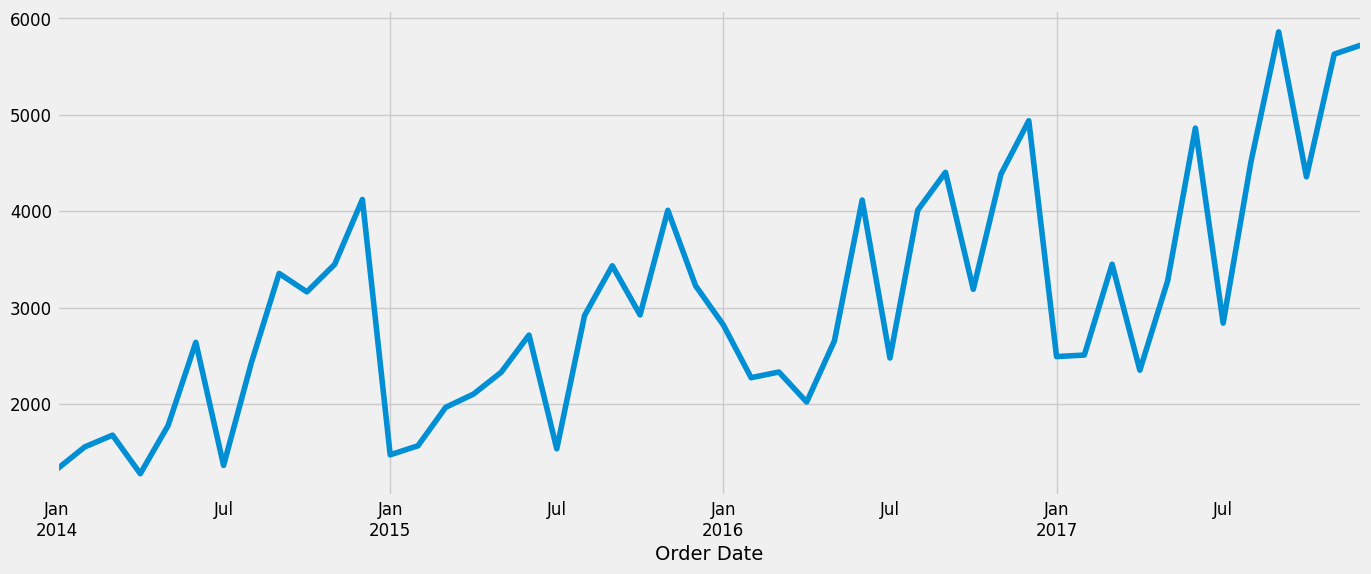

In [9]:
y.plot(figsize=(15, 6))
plt.show()


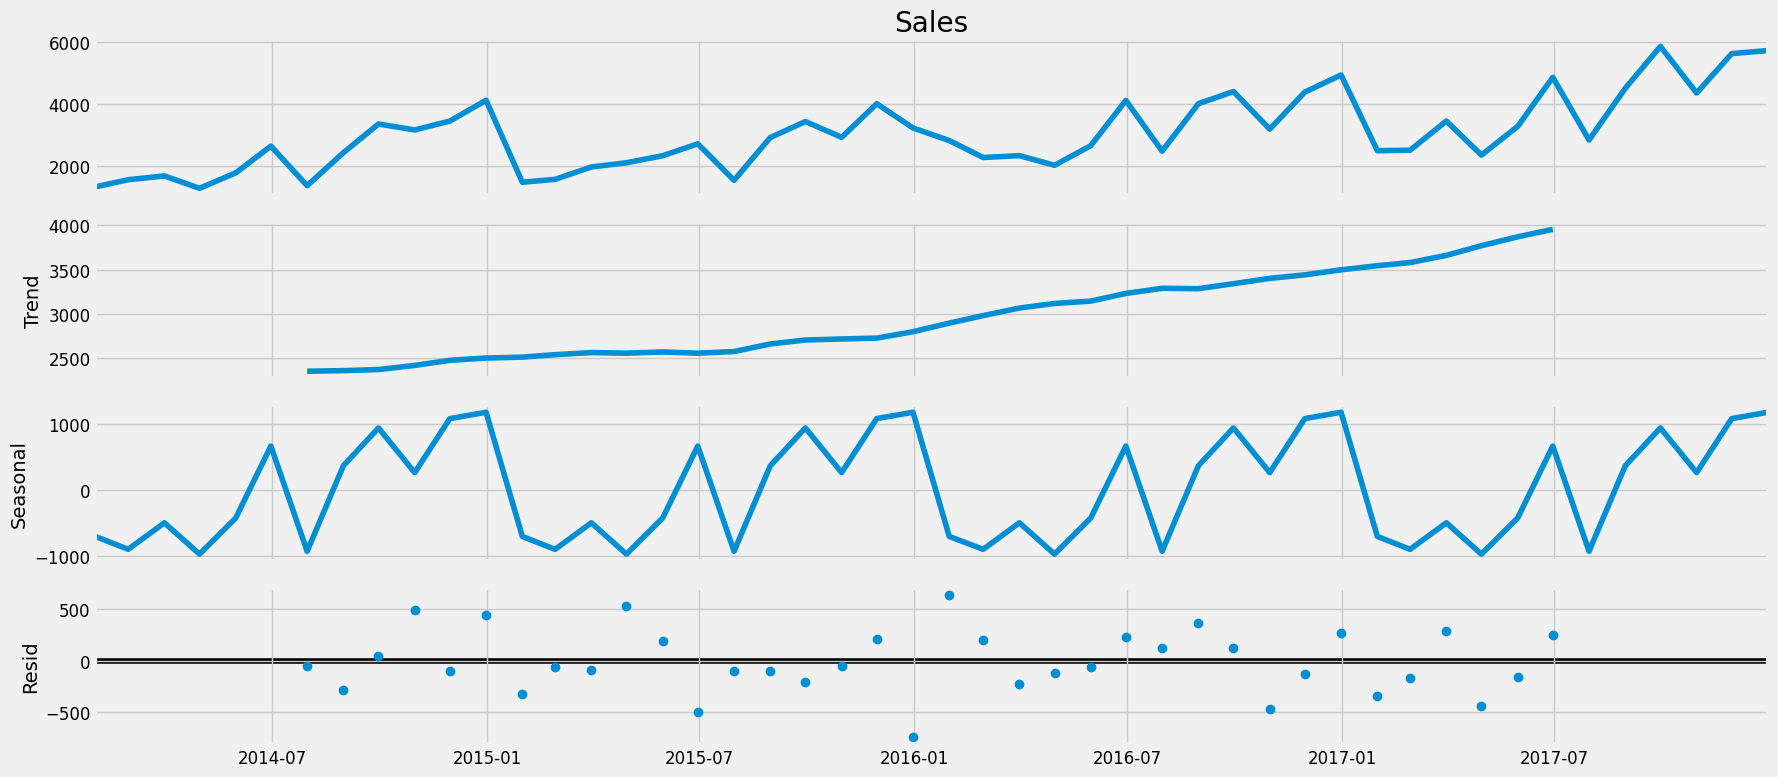

In [10]:
# Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Modelos ARIMA

In [11]:
# ------------------------------------
# Predicción ARIMA
# ------------------------------------

y_train = y[:'2016-12-31']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# Ajuste de hiperparámetros
mejor = np.inf
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < mejor:
                mejor = results.aic
                mejores_parametros = [param, param_seasonal]
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:678.1139555172753
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:661.2441800885957
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:387.3682540710637
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:389.34177708058144
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:615.316871114514
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:617.1869674268371
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:389.31175190669825
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:387.53150179837485
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:646.4303911547896
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:633.7632104217951
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:386.5603296974358
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:388.4825880381524
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:606.9719403329663
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:607.721162008137
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 -

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.302     -3.312      0.001      -1.592      -0.408
ar.S.L12      -0.7485      0.107     -6.969      0.000      -0.959      -0.538
sigma2      1.396e+05   2.16e-06   6.45e+10      0.000     1.4e+05     1.4e+05


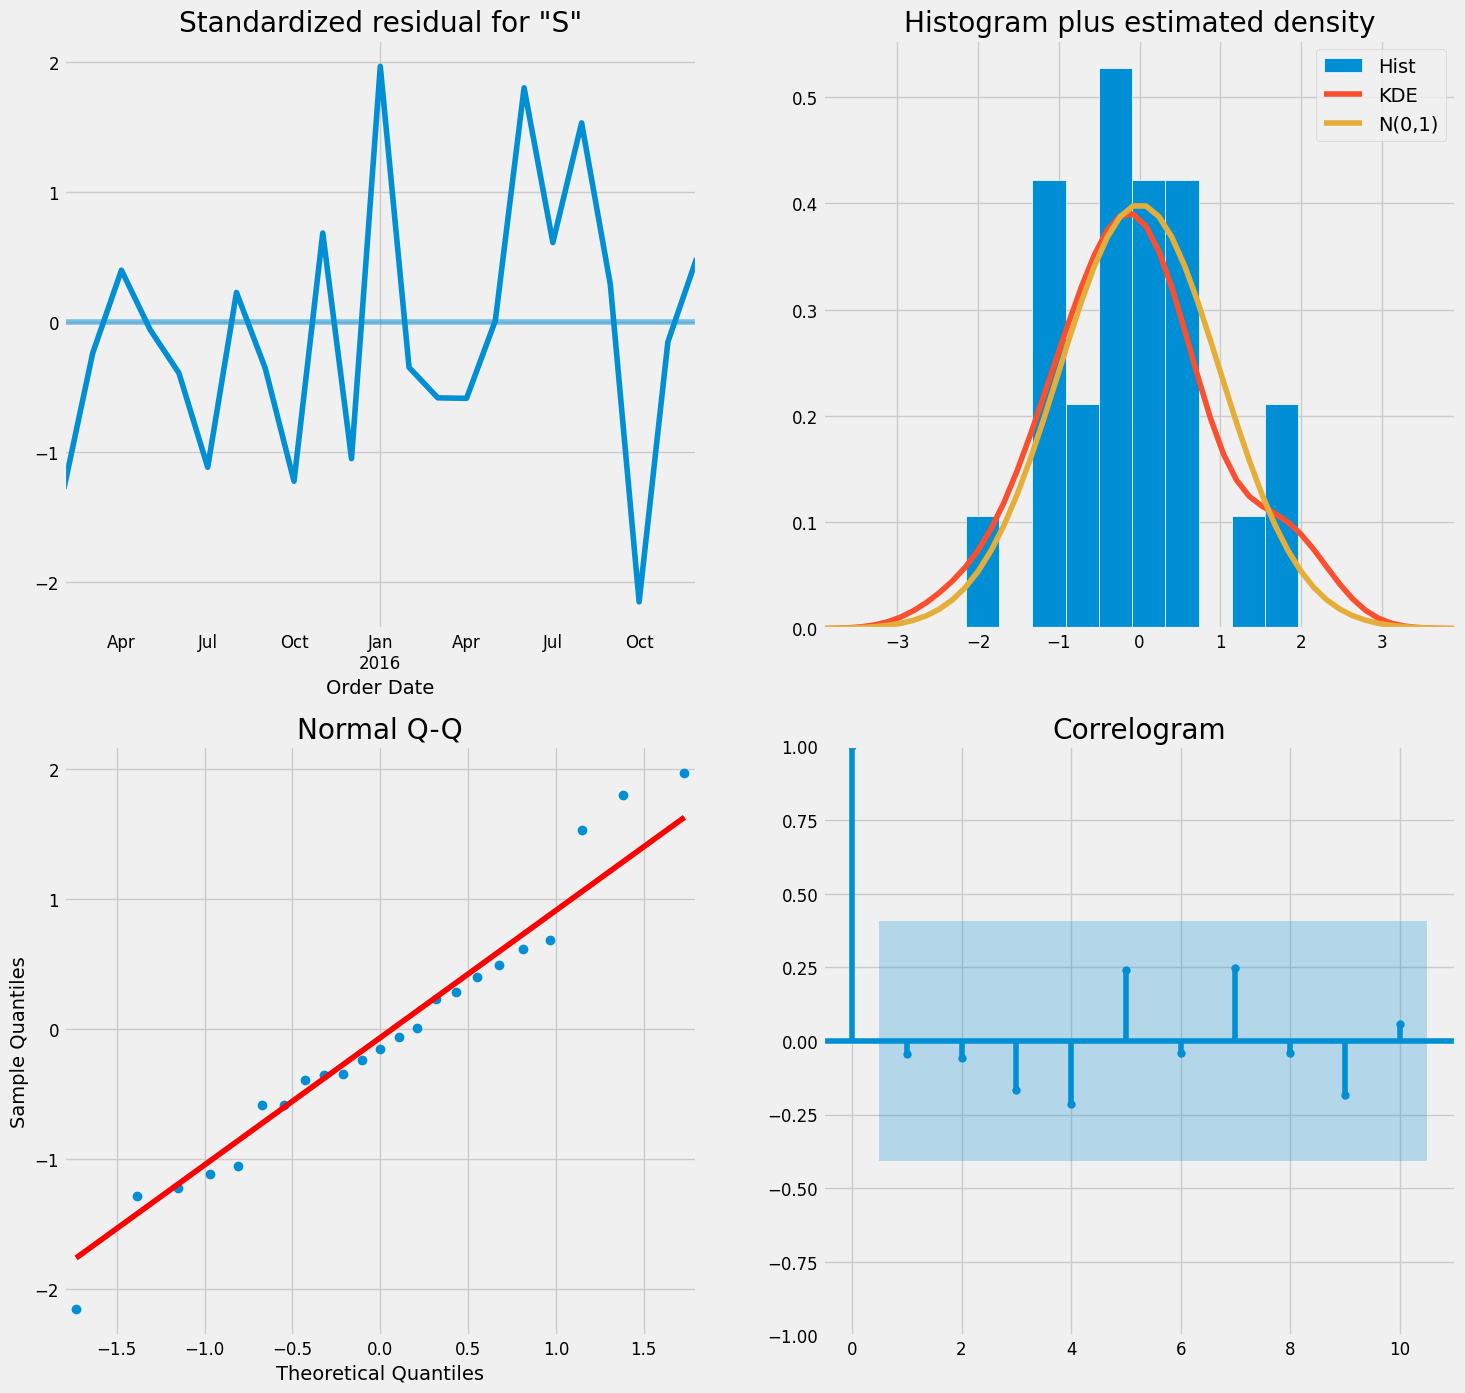

In [12]:
# Ajuste del modelo
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=mejores_parametros[0],
                                seasonal_order=mejores_parametros[1],
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 16))
plt.show()


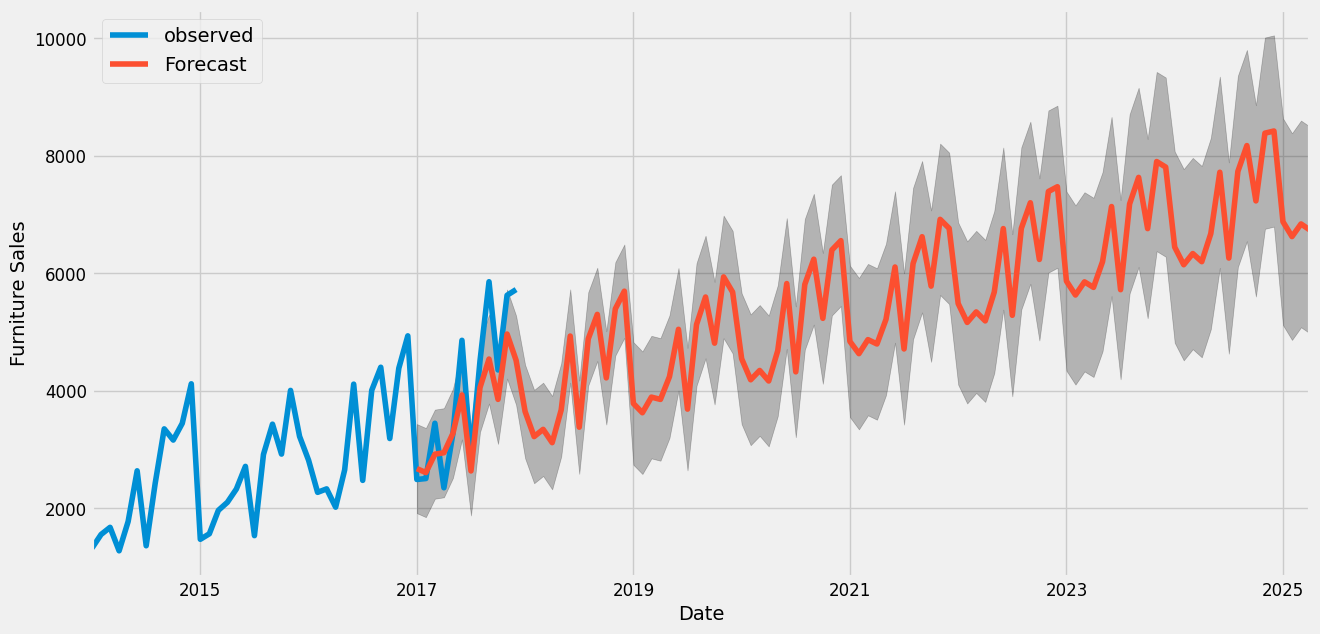

In [13]:
# Predicción a múltiples pasos
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [14]:

# Evaluación de la predicción ARIMA
y_truth = y['2017-01-31':]
predicciones_arima = pred_uc.predicted_mean[y_truth.index]

mse = ((predicciones_arima - y_truth) ** 2).mean()
rele = (np.abs(predicciones_arima - y_truth)/y_truth*100).mean()
print('Error cuadrático medio ARIMA {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM ARIMA {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio ARIMA {}'.format(round(rele, 2)))


Error cuadrático medio ARIMA 470958.92
Raíz cuadrada de ECM ARIMA 686.26
Error porcentual medio ARIMA 12.92


## Series multivaluadas

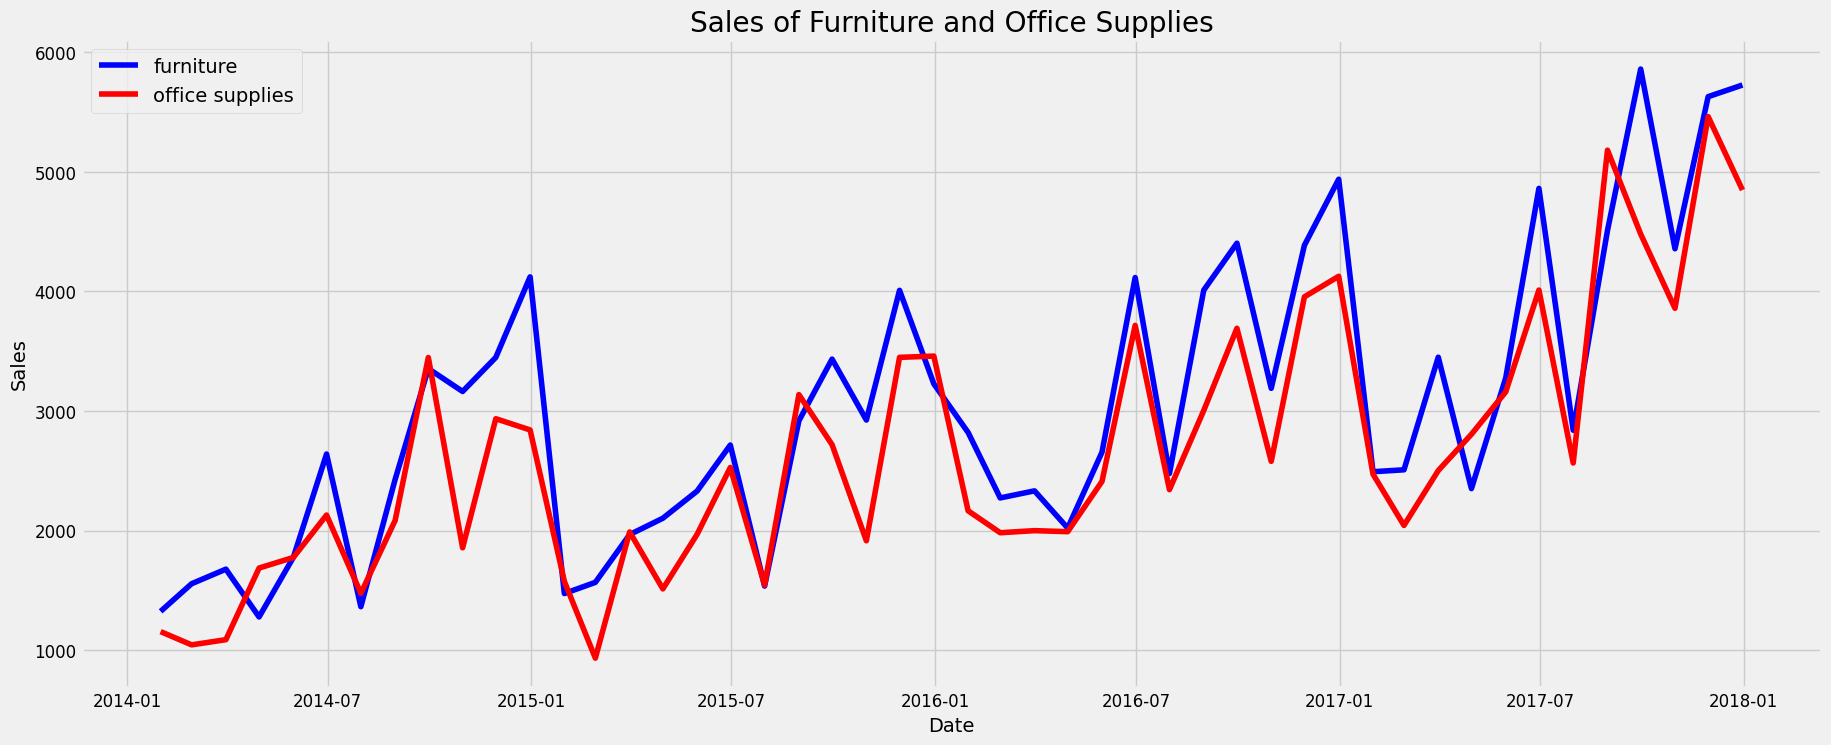

In [ ]:
# Segunda categoría de productos
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']


# Combinación de ambos productos en el mismo dataframe con ventas mensuales
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('M').mean()
y_office = office['Sales'].resample('M').mean()
furniture = pd.DataFrame(
    {'Order Date': y_furniture.index, 'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales',
             'Sales_y': 'office_sales'}, inplace=True)
store.head()

plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'],
         'b-', label='furniture')
plt.plot(store['Order Date'], store['office_sales'],
         'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()
plt.show()


## Holt-Winters

Error cuadrático medio HW 315791.62
Raíz cuadrada de ECM HW 561.95
Error porcentual medio HW 11.41


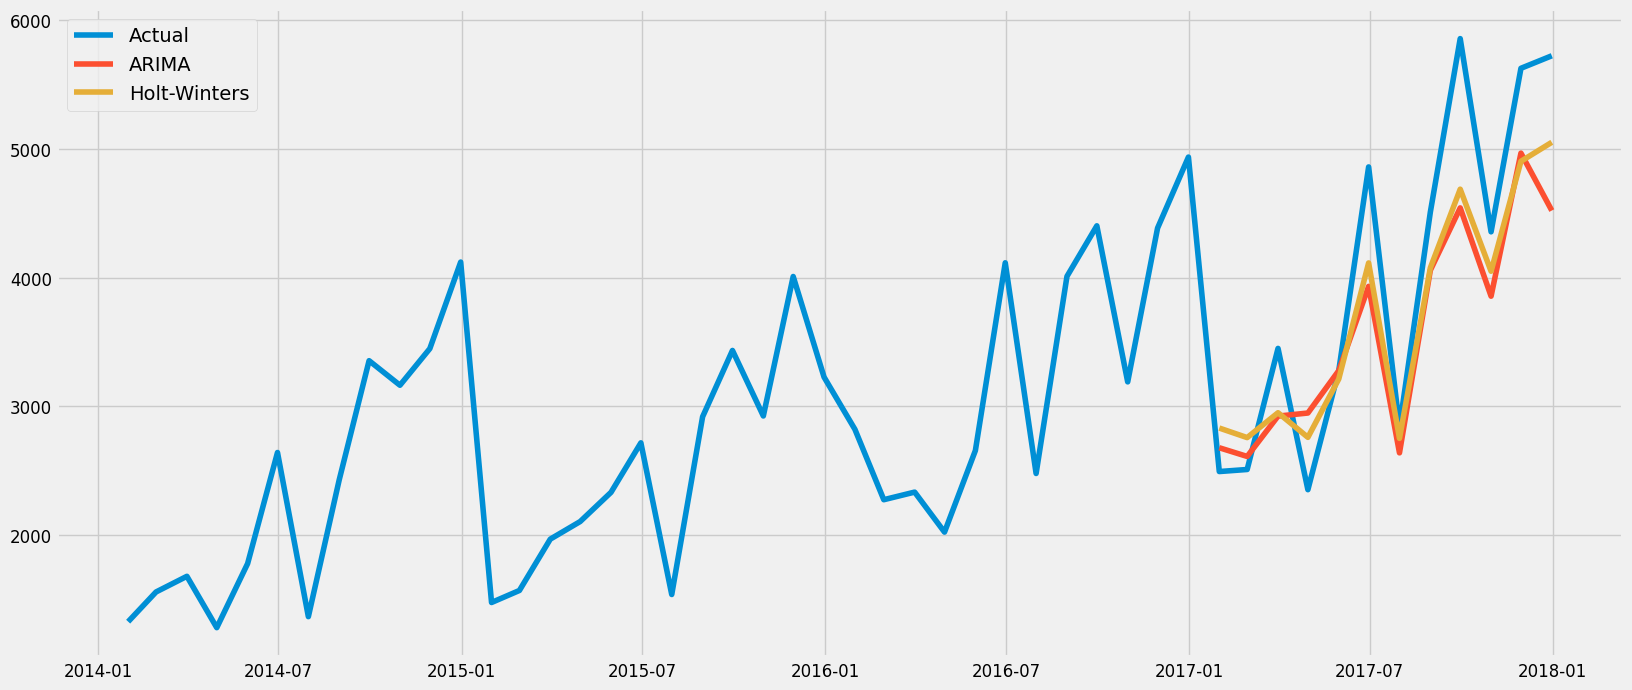

In [16]:

# ------------------------------------
# Holt-Winters
# ------------------------------------
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa.api import ExponentialSmoothing
hw_model = ExponentialSmoothing(
    y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
predicciones_hw = hw_model.forecast(12)

mse = ((predicciones_hw - y_truth) ** 2).mean()
rele = (np.abs(predicciones_hw - y_truth)/y_truth*100).mean()
print('Error cuadrático medio HW {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM HW {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio HW {}'.format(round(rele, 2)))

plt.plot(furniture.set_index("Order Date"), label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.legend()
plt.show()


## Prophet - ejemplo sencillo

In [17]:
# ------------------------------------
# Prophet
# ------------------------------------


import pandas as pd
from datetime import datetime
datelist = pd.date_range(datetime.today(), periods=100).tolist()
valores = np.arange(100)+np.random.normal(loc=0, scale=10, size=100)+15*np.sin(2*np.pi*np.arange(100)/7)

ejemplo = pd.DataFrame(
    {"ds": datelist, "y": valores}
)

display(ejemplo)


,ds,y
0,2025-12-02 19:00:29.644132,12.731089
1,2025-12-03 19:00:29.644132,3.403269
2,2025-12-04 19:00:29.644132,25.602135
3,2025-12-05 19:00:29.644132,22.304843
4,2025-12-06 19:00:29.644132,17.997435
...,...,...
95,2026-03-07 19:00:29.644132,82.671345
96,2026-03-08 19:00:29.644132,86.671248
97,2026-03-09 19:00:29.644132,96.290946
98,2026-03-10 19:00:29.644132,103.034430


<Axes: xlabel='ds'>

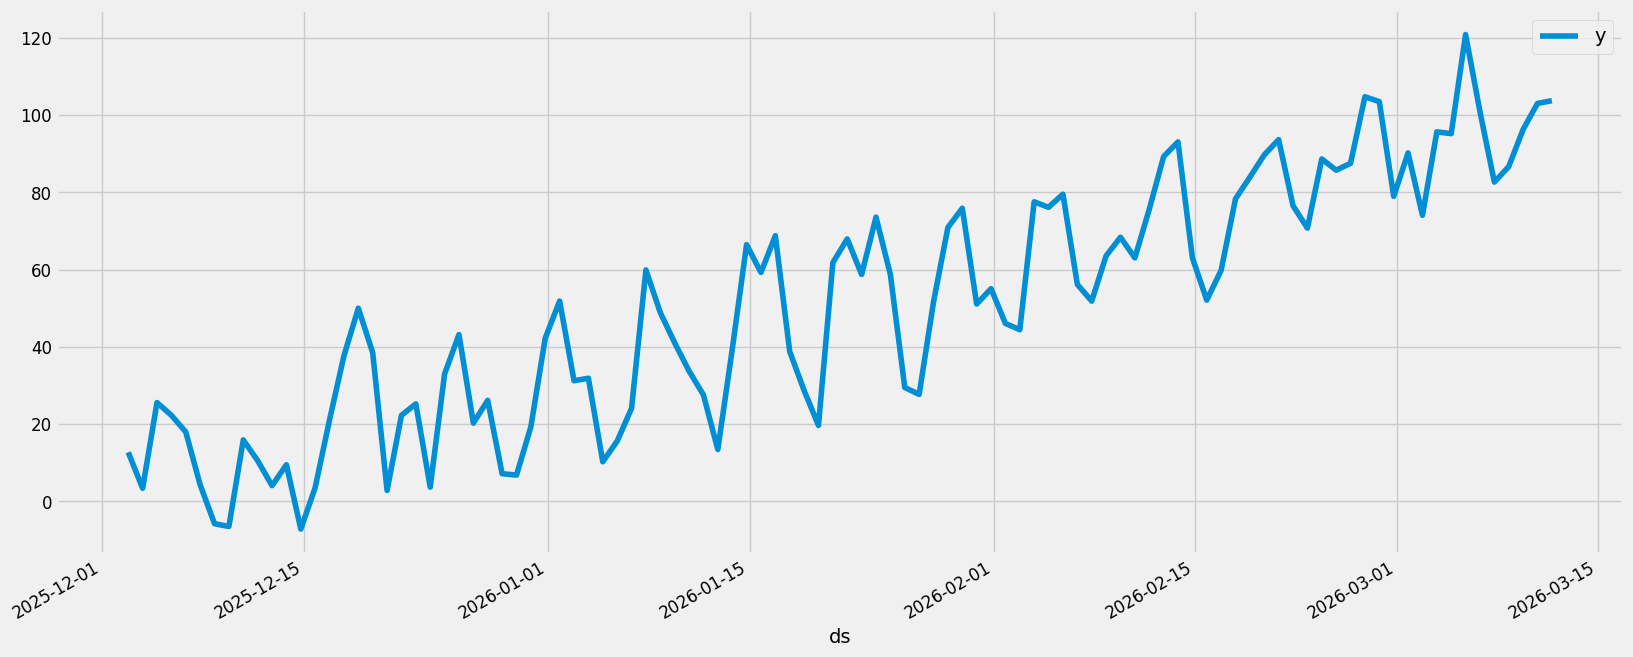

In [34]:
ejemplo.plot(x="ds",y="y")

In [19]:
from prophet import Prophet
m = Prophet(interval_width=0.9)
m.fit(ejemplo)

19:00:37 - cmdstanpy - INFO - Chain [1] start processing
19:00:37 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = m.make_future_dataframe(periods=100)
future.tail()


,ds
195,2026-06-15 19:00:29.644132
196,2026-06-16 19:00:29.644132
197,2026-06-17 19:00:29.644132
198,2026-06-18 19:00:29.644132
199,2026-06-19 19:00:29.644132


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
195,2026-06-15 19:00:29.644132,180.460713,165.204801,195.460062
196,2026-06-16 19:00:29.644132,194.190823,179.202548,209.880579
197,2026-06-17 19:00:29.644132,206.806804,192.412368,222.048079
198,2026-06-18 19:00:29.644132,213.826982,198.757324,228.515527
199,2026-06-19 19:00:29.644132,205.977828,190.700815,222.397529


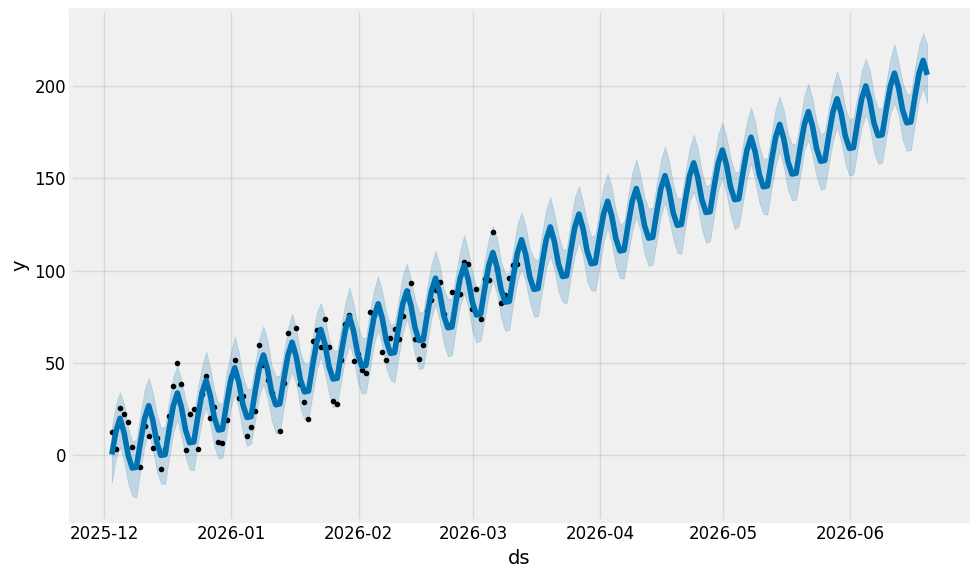

In [22]:
fig1 = m.plot(forecast)

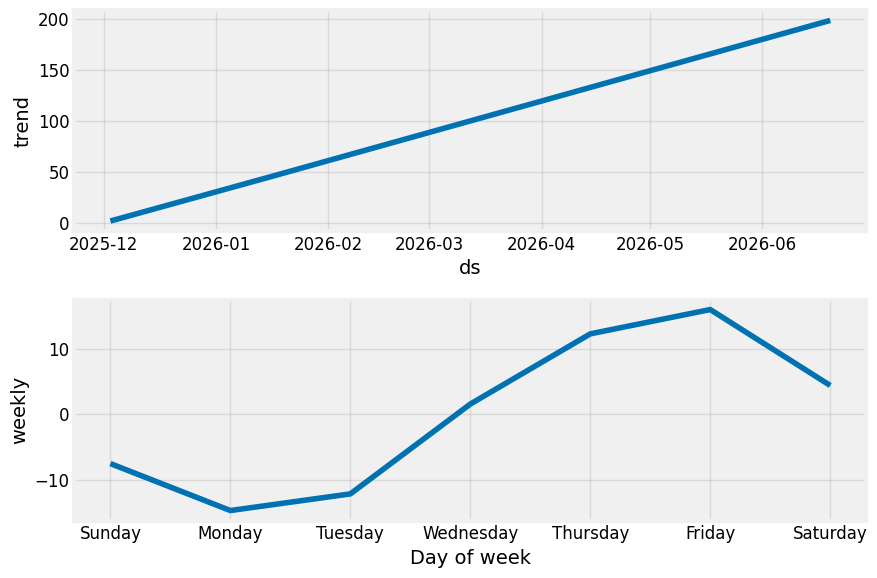

In [23]:
fig2 = fig2 = m.plot_components(forecast)

In [36]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

KeyError: 'ds'

In [29]:
# plot_components_plotly(m, forecast)

## Prophet - ventas

19:04:00 - cmdstanpy - INFO - Chain [1] start processing
19:04:01 - cmdstanpy - INFO - Chain [1] done processing
19:04:01 - cmdstanpy - INFO - Chain [1] start processing
19:04:01 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

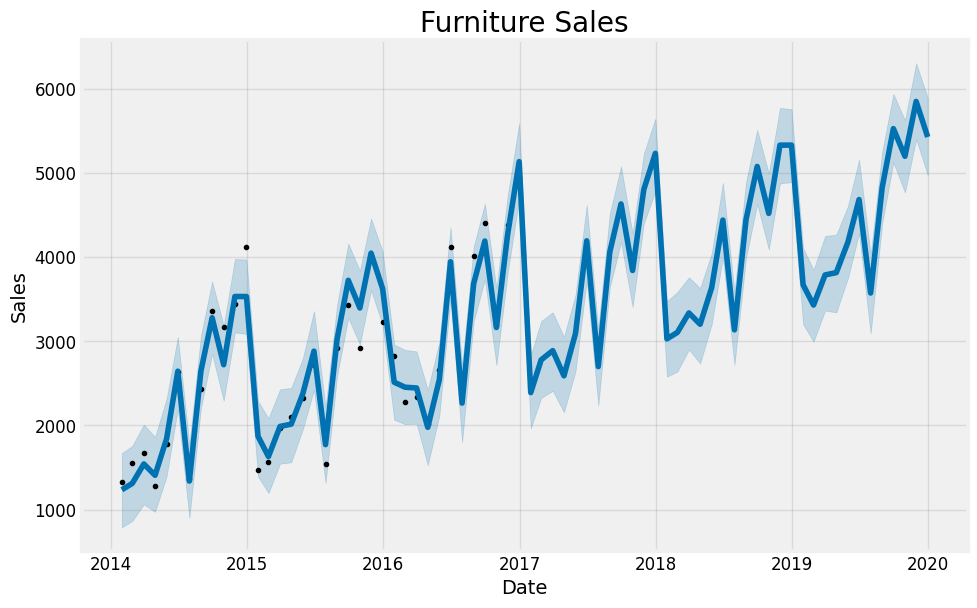

<Figure size 1800x600 with 0 Axes>

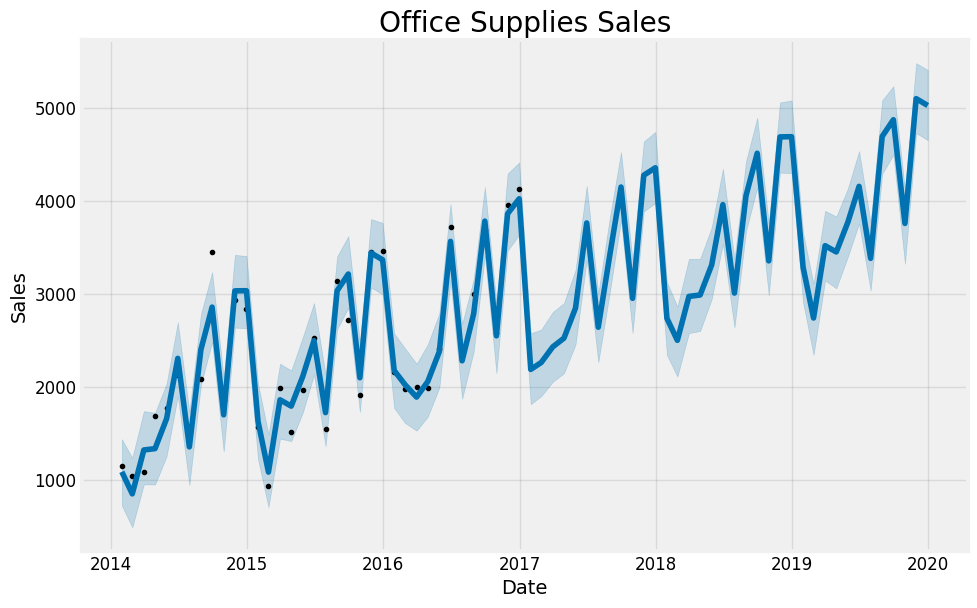

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-31,2140.571730,789.605373,1670.936972,2140.571730,2140.571730,-904.551880,-904.551880,-904.551880,-904.551880,...,-791.317323,-791.317323,-791.317323,-791.317323,-791.317323,-791.317323,0.0,0.0,0.0,1088.538311
1,2014-02-28,2174.653880,866.131832,1758.525322,2174.653880,2174.653880,-862.869552,-862.869552,-862.869552,-862.869552,...,-1059.696695,-1059.696695,-1059.696695,-1059.696695,-1059.696695,-1059.696695,0.0,0.0,0.0,851.486345
2,2014-03-31,2212.387689,1064.076535,2010.165511,2212.387689,2212.387689,-669.508715,-669.508715,-669.508715,-669.508715,...,-622.527137,-622.527137,-622.527137,-622.527137,-622.527137,-622.527137,0.0,0.0,0.0,1323.339817
3,2014-04-30,2248.904278,973.160410,1862.606668,2248.904278,2248.904278,-840.697558,-840.697558,-840.697558,-840.697558,...,-641.555154,-641.555154,-641.555154,-641.555154,-641.555154,-641.555154,0.0,0.0,0.0,1337.876878
4,2014-05-31,2286.638087,1395.584631,2318.985419,2286.638087,2286.638087,-444.061695,-444.061695,-444.061695,-444.061695,...,-353.441727,-353.441727,-353.441727,-353.441727,-353.441727,-353.441727,0.0,0.0,0.0,1660.674218


In [30]:

# Dataframes para Prophet (columnas ds / y)

furniture = df.loc[df['Category'] == 'Furniture']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture = furniture['Sales'].resample('M').mean()
furniture_train = furniture[:'2016-12-31'].to_frame()
furniture_train.index.name = "ds"
furniture_train = furniture_train.rename(columns={'Sales': 'y'})
furniture_train.reset_index(inplace=True)

office = df.loc[df['Category'] == 'Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office.drop(cols, axis=1, inplace=True)
office = office.sort_values('Order Date')
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
office = office['Sales'].resample('M').mean()
office_train = office[:'2016-12-31'].to_frame()
office_train.index.name = "ds"
office_train = office_train.rename(columns={'Sales': 'y'})
office_train.reset_index(inplace=True)

furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture_train)

office_model = Prophet(interval_width=0.95)
office_model.fit(office_train)

furniture_forecast = furniture_model.make_future_dataframe(
    periods=36, freq='M')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='M')
office_forecast = office_model.predict(office_forecast)

plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales')
plt.show()

plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel='Date', ylabel='Sales')
plt.title('Office Supplies Sales')
plt.show()

# Comparación de predicciones
furniture_names = ['furniture_%s' %
                   column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast,
                    how='inner', left_on='furniture_ds', right_on='office_ds')
forecast = forecast.rename(
    columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()


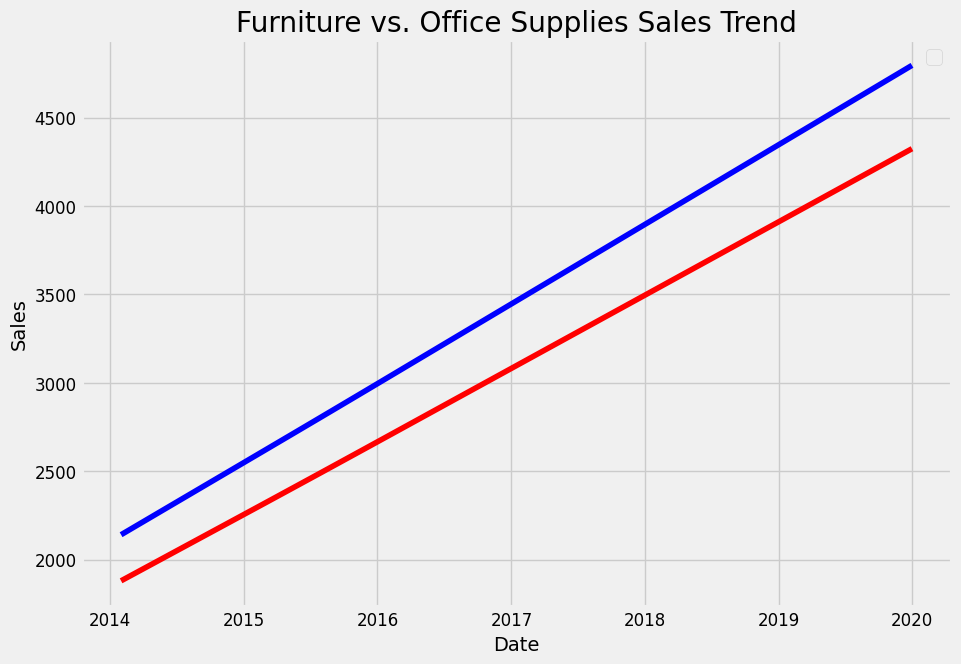

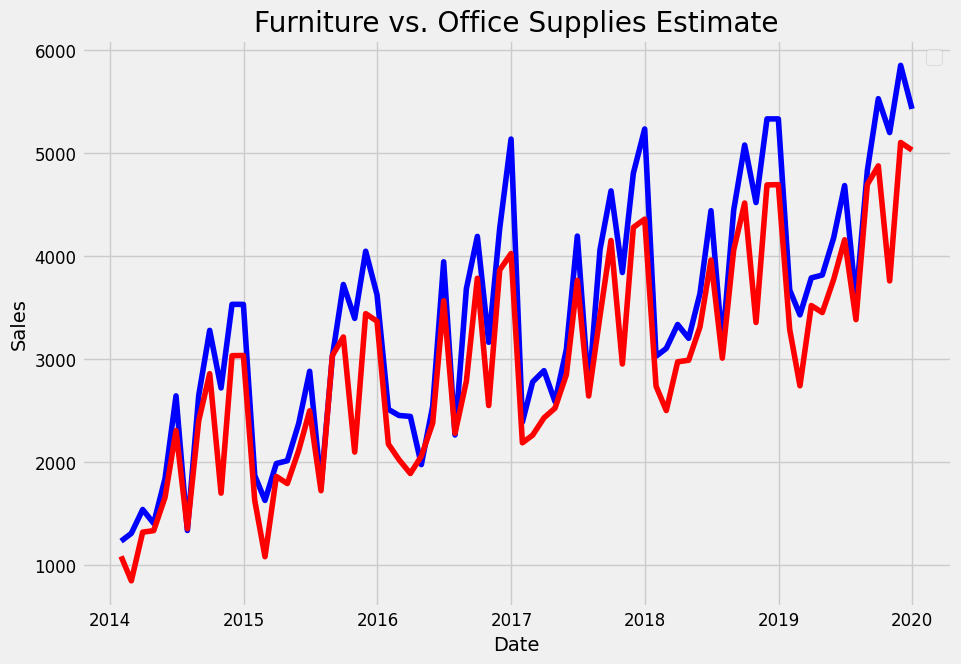

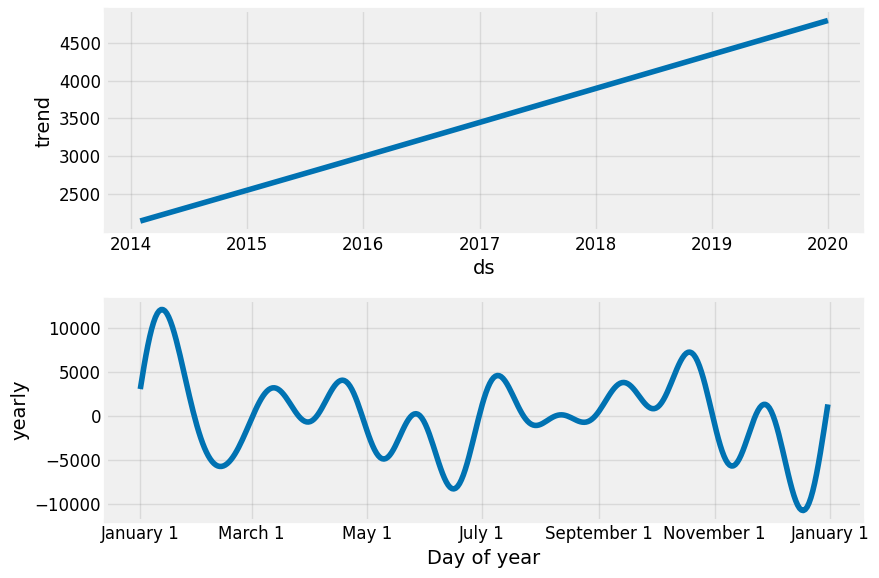

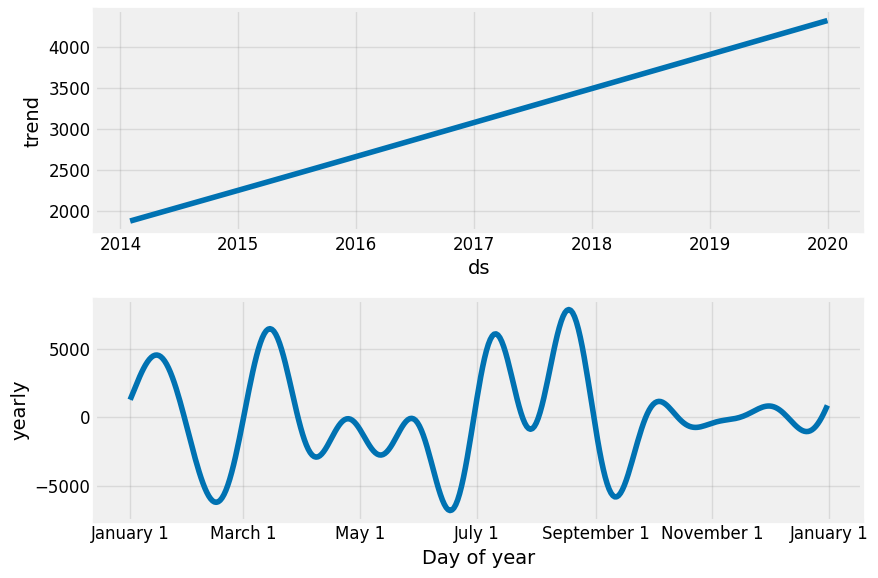

In [31]:
# Tendencias
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate')
plt.show()

furniture_model.plot_components(furniture_forecast)
plt.show()

office_model.plot_components(office_forecast)
plt.show()
plt.close()


Error cuadrático medio ARIMA 470958.92
Raíz cuadrada de ECM ARIMA 686.26
Error porcentual medio ARIMA 12.92
Error cuadrático medio PROPHET 321096.9
Raíz cuadrada de ECM PROPHET 566.65
Error porcentual medio PROPHET 10.97


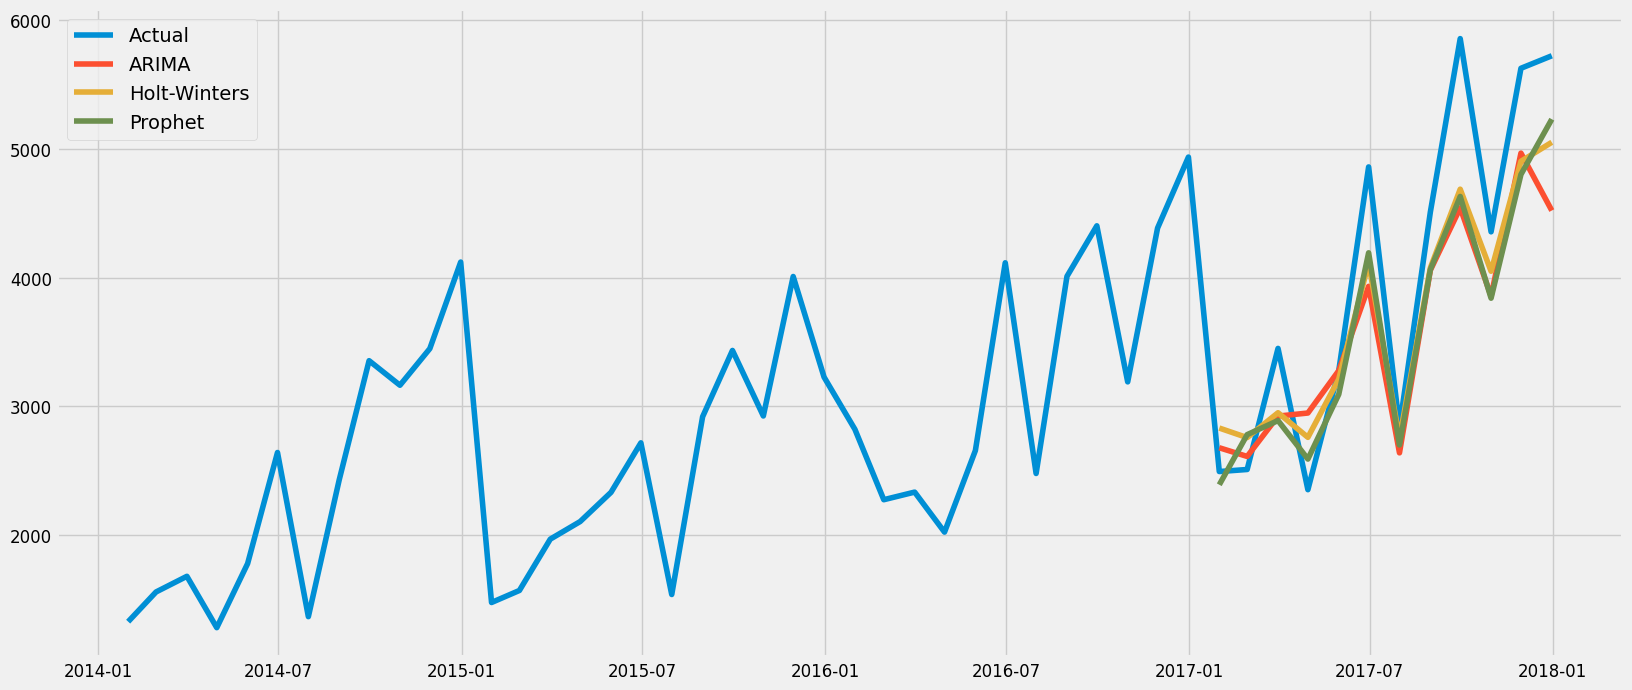

In [32]:

# ------------------------------------
# COMPARATIVA PREDICCION ARIMA-PROPHET
# ------------------------------------

mse = ((predicciones_arima - y_truth) ** 2).mean()
rele = (np.abs(predicciones_arima - y_truth)/y_truth*100).mean()
print('Error cuadrático medio ARIMA {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM ARIMA {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio ARIMA {}'.format(round((rele), 2)))

furniture_forecast.set_index("ds", inplace=True)
predicciones_prophet = furniture_forecast.loc[y_truth.index, "yhat"]
mse = ((predicciones_prophet - y_truth) ** 2).mean()
rele = (np.abs(predicciones_prophet - y_truth)/y_truth*100).mean()
print('Error cuadrático medio PROPHET {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM PROPHET {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio PROPHET {}'.format(round((rele), 2)))

plt.plot(furniture, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.legend()
plt.show()


## Prophet - variables exógenas

In [ ]:
datelist = pd.date_range(datetime.today(), periods=100).tolist()
valores = np.arange(100)+np.random.normal(loc=0, scale=10, size=100)+15*np.sin(2*np.pi*np.arange(100)/7)+25*np.cos(2*np.pi*np.arange(100)/14)

ejemplo = pd.DataFrame(
    {"ds": datelist, "y": valores}
)

display(ejemplo)

In [ ]:
combinado = Prophet(interval_width=0.95)
combinado.fit(ejemplo)
forecast = combinado.make_future_dataframe(periods=36, freq='M')
forecast = combinado.predict(ejemplo)
plot_plotly(combinado, forecast)

In [ ]:
plot_components_plotly(combinado, forecast)


In [ ]:
ejemplo["entrada"] = np.cos(2*np.pi*np.arange(100)/14)
display(ejemplo)

In [ ]:
combinado = Prophet(interval_width=0.95)
combinado.add_regressor("entrada", standardize=False)
combinado.fit(ejemplo)
forecast = combinado.make_future_dataframe(periods=36, freq='M')
forecast = combinado.predict(ejemplo)
plot_plotly(combinado, forecast)

In [ ]:
plot_components_plotly(combinado, forecast)

# Prophet - Ventas + variables exógenas

In [ ]:

# ------------------------------------
# PROPHET múltiple
# ------------------------------------


# modelo combinado:
# Añadimos como entrada la predicción de los precios de los productos de oficina
combinado_train = furniture_train.copy()
combinado_train["office"] = office_model.predict(office_train)["yhat"]

combinado_model = Prophet(interval_width=0.95)
combinado_model.add_regressor("office", standardize=False)
combinado_model.fit(combinado_train)
combinado_forecast = combinado_model.make_future_dataframe(
    periods=36, freq='M')
combinado_forecast["office"] = office_forecast["yhat"]
combinado_forecast = combinado_model.predict(combinado_forecast)
combinado_forecast.set_index("ds", inplace=True)

predicciones_prophet2 = combinado_forecast.loc[y_truth.index, "yhat"]
mse = ((predicciones_prophet2 - y_truth) ** 2).mean()
rele = (np.abs(predicciones_prophet2 - y_truth)/y_truth*100).mean()
print('Error cuadrático medio PROPHET múltiple {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM PROPHET múltiple {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio PROPHET múltiple {}'.format(round((rele), 2)))

plt.plot(furniture, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(predicciones_prophet2, label="Prophet múltiple")
plt.legend()
plt.title('Furniture Sales')
plt.show()


In [ ]:
# ! pip install --upgrade "gluonts[torch]"

# DeepAR

In [ ]:
# pip install "gluonts[torch]"

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
import torch


## Ejemplo sencillo

In [ ]:
# -----------------------------------------------------------------------------
# DeepAR
# -----------------------------------------------------------------------------


datelist = pd.date_range(datetime.today(), periods=100).tolist()
valores = np.arange(100)+np.random.normal(loc=0, scale=10, size=100)+15*np.sin(2*np.pi*np.arange(100)/7)

ejemplo = pd.DataFrame(
    {"fecha": datelist, "variable": valores}
)
ejemplo.set_index("fecha",inplace=True)

display(ejemplo)

endTrain = ejemplo.index[75]

# Una variable "target", una fecha "start" y una frecuencia
training_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:endTrain,"variable"], }],
    freq="D"
)
# Train + test
test_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:,"variable"], }],
    freq="D"
)

to_pandas(test_data[0]).plot()
plt.axvline(endTrain, color='r')  
plt.grid(which="both")
plt.show()


In [ ]:
estimator = DeepAREstimator(freq="D",
                            prediction_length=25,
                            trainer_kwargs={"max_epochs": 100, "accelerator": "cpu"}) 

predictor = estimator.train(training_data)

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry, plot_length, endTrain):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)
    forecast_entry.plot(show_label=True)
    plt.grid(which="both")
    plt.legend(loc="upper left")
    plt.axvline(endTrain, lw=1, color='r') 
    plt.show()


In [ ]:

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
tss = list(ts_it)

print(f"Number of sample paths: {forecasts[0].num_samples}")
print(f"Dimension of samples: {forecasts[0].samples.shape}")
print(f"Start date of the forecast window: {forecasts[0].start_date}")
print(f"Frequency of the time series: {forecasts[0].freq}")

plot_prob_forecasts(tss[0], forecasts[0], 100, endTrain)
plt.show()

forecasts[0].plot(show_label=True)
plt.legend()


## Ejemplo sencillo - múltiples series

In [ ]:
# Predicción múltiple
ejemplo["entrada"] = np.cos(2*np.pi*np.arange(100)/14)
display(ejemplo)


In [ ]:
# Una variable "target", una fecha "start" y una frecuencia
training_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:endTrain,"variable"]}, 
     {"start": ejemplo.index[0], "target": ejemplo.loc[:endTrain,"entrada"]}],
    freq="D"
)
# Train + test
test_data = ListDataset(
    [{"start": ejemplo.index[0], "target": ejemplo.loc[:,"variable"]}, 
     {"start": ejemplo.index[0], "target": ejemplo.loc[:,"entrada"]}],
    freq="D"
)

to_pandas(test_data[0]).plot()
to_pandas(test_data[1]).plot()
plt.axvline(endTrain, color='g')  
plt.grid(which="both")
plt.show()


In [ ]:
estimator = DeepAREstimator(freq="D",
                            prediction_length=25,
                            trainer_kwargs={"max_epochs": 100, "accelerator": "cpu"}) 

predictor = estimator.train(training_data)

In [ ]:

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)
forecasts = list(forecast_it)
tss = list(ts_it)

plot_prob_forecasts(tss[0], forecasts[0], 100, endTrain)
plot_prob_forecasts(tss[1], forecasts[1], 100, endTrain)
plt.show()

forecasts[0].plot(show_label=True)
forecasts[1].plot(show_label=True)
plt.legend()

# DeepAR - ventas

In [ ]:


furniture_da = df.loc[df['Category'] == 'Furniture']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture_da.drop(cols, axis=1, inplace=True)
furniture_da = furniture_da.sort_values('Order Date')
furniture_da = furniture_da.groupby('Order Date')['Sales'].sum().reset_index()
furniture_da = furniture_da.set_index('Order Date')
df_furniture = pd.DataFrame(furniture_da['Sales'].resample('M').mean())

# Entrenamiento
steps = 12
endTrain = df_furniture.index[-steps-1]

training_data = ListDataset(
    [{"start": df_furniture.index[0], "target": df_furniture.Sales[:endTrain], }],
    freq="M"
)

# Train
entry = next(iter(training_data))
train_series = to_pandas(entry)

# Test (en realidad, train + test)
test_data = ListDataset(
    [{"start": df_furniture.index[0], "target": df_furniture.Sales}],
    freq="M"
)

entry = next(iter(test_data))
test_series = to_pandas(entry)

test_series.plot()
plt.axvline(endTrain, color='r')  # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()


In [ ]:

# context_length — The number of time-points that the model gets to see before making the prediction.
# prediction_length — The number of time-steps that the model is trained to predict, also called the forecast horizon.
# freq — The granularity of the time series in the dataset.
# num_layers — The number of hidden layers in the RNN.


estimator = DeepAREstimator(freq="M",
                            context_length=24,
                            prediction_length=steps,
                            trainer_kwargs={"max_epochs": 100, "accelerator": "cpu"}) 
                            # trainer_kwargs={"max_epochs": 100, "accelerator": "mps"})

predictor = estimator.train(training_data)

# Estimación en la última ventana del conjunto de test
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)



In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
forecast_entry = forecasts[0]
print(f"Number of sample paths: {forecast_entry.num_samples}")
print(f"Dimension of samples: {forecast_entry.samples.shape}")
print(f"Start date of the forecast window: {forecast_entry.start_date}")
print(f"Frequency of the time series: {forecast_entry.freq}")
forecast_entry.plot(show_label=True)
plt.legend()

In [ ]:
forecasts[0].plot(show_label=True)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
forecasts[0].plot(ax=ax)
tss[0].plot(ax=ax)
plt.axvline(endTrain, lw=1, color='r')
plt.show()

plt.plot(furniture, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(predicciones_prophet2, label="Prophet múltiple")
plt.plot(forecasts[0].mean_ts, label="DeepAR")
plt.legend()
plt.title('Furniture Sales')
plt.show()

predicciones_deepar = forecast_entry.mean_ts[endTrain:]
mse = ((predicciones_deepar.values - y_truth.values) ** 2).mean()
rele = (np.abs(predicciones_deepar.values -
        y_truth.values)/y_truth.values*100).mean()
print('Error cuadrático medio DEEPAR {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM DEEPAR {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio DEEPAR {}'.format(round((rele), 2)))

## DeepAR - ventas + múltiples series

In [ ]:

# -----------------------------------------------------------------------------
# DeepAR múltiple: el mismo modelo se usa para varias series
# -----------------------------------------------------------------------------

office_da = df.loc[df['Category'] == 'Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office_da.drop(cols, axis=1, inplace=True)
office_da = office_da.sort_values('Order Date')
office_da = office_da.groupby('Order Date')['Sales'].sum().reset_index()
office_da = office_da.set_index('Order Date')
df_office = pd.DataFrame(office_da['Sales'].resample('M').mean())


training_data2 = ListDataset(
    data_iter=[
        {"start": df_furniture.index[0],
            "target": df_furniture.Sales[:endTrain].values},
        {"start": df_office.index[0],
            "target": df_office.Sales[:endTrain].values}
    ],
    freq="M"
)

test_data2 = ListDataset(
    data_iter=[
        {"start": df_furniture.index[0], "target": df_furniture.Sales.values},
        {"start": df_office.index[0], "target": df_office.Sales.values}
    ],
    freq="M"
)
# num_layers: The number of layers in the LSTM neural network. 
# context_length: The number of past time steps the model should consider when making a prediction. 
# hidden_size: The number of hidden units (neurons) in each LSTM layer. 
# dropout_rate: The dropout rate applied to the LSTM layers to prevent overfitting. 
# lr: The learning rate for the model’s optimizer. 
# batch_size: The number of samples used for each update of the model’s weights during training.

estimator2 = DeepAREstimator(freq="M",
                             num_layers = 2,
                             hidden_size = 40,
                             dropout_rate=0.01,
                             context_length=24,
                             batch_size=256,
                             prediction_length=steps,
                             trainer_kwargs={"max_epochs": 200, "accelerator":"cpu"})
                             # {"max_epochs":100, "accelerator":"mps"}

predictor2 = estimator2.train(training_data2)





In [ ]:
# Estimación en la última ventana del conjunto de test
forecast_it2, ts_it2 = make_evaluation_predictions(
    dataset=test_data2,  # test dataset
    predictor=predictor2,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts2 = list(forecast_it2)
tss2 = list(ts_it2)

forecasts2[0].plot(show_label=True)
forecasts2[1].plot(show_label=True)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
forecasts2[0].plot(ax=ax)
tss2[0].plot(ax=ax)
forecasts2[1].plot(ax=ax)
tss2[1].plot(ax=ax)
plt.axvline(endTrain, lw=1, color='r')
plt.show()

plt.plot(furniture, label="Actual", c="black", lw=1, ls="dashed")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(predicciones_prophet2, label="Prophet múltiple")
plt.plot(forecasts[0].mean_ts, label="DeepAR")
plt.plot(forecasts2[0].mean_ts, label="DeepAR múltiple")
plt.legend()
plt.title('Furniture Sales')
plt.show()

In [ ]:
predicciones_deepar2 = forecasts2[0].mean_ts['2017-01-31':'2017-12-31']
mse = ((predicciones_deepar2.values - y_truth.values) ** 2).mean()
rele = (np.abs(predicciones_deepar2.values -
        y_truth.values)/y_truth.values*100).mean()
print('Error cuadrático medio DEEPAR 2 {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM DEEPAR 2 {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio DEEPAR 2 {}'.format(round(rele, 2)))


# Predicciones recursivas

In [ ]:

# -----------------------------------------------------------------------------
# Estimaciones recurrentes con DeepAR
# -----------------------------------------------------------------------------


frag = 12
hsteps = steps//frag
NCICLOS = 10
nuevosdatos = np.zeros(hsteps)
for repeticion in range(NCICLOS*frag):
    #
    # Se le alimenta como entrada la última predicción
    #
    test_data3 = ListDataset(
        data_iter=[
            {"start": df_furniture.index[0],
             "target": np.concatenate((df_furniture.Sales.values, nuevosdatos))},
        ],
        freq="M"
    )

    forecast_it3, ts_it3 = make_evaluation_predictions(
        dataset=test_data3,  # train dataset
        predictor=predictor2,  # predictor (el modelo de 2 series)
        num_samples=100,  # number of sample paths we want for evaluation
    )

    forecasts3 = list(forecast_it3)
    tss3 = list(ts_it3)
    ts_entry3 = tss2[0]
    forecast_entry3 = forecasts3[0]

    if repeticion == 0:
        forecast = forecast_entry3.mean_ts[:-(steps-hsteps)]
    else:
        forecast = pd.concat(
            (forecast, forecast_entry3.mean_ts[:-(steps-hsteps)]))

    nuevosdatos = np.concatenate(
        (nuevosdatos, forecast_entry3.mean_ts[:-(steps-hsteps)]))

#
# Comparativa de predicciones a largo plazo
#
furniture_forecast2 = furniture_model.make_future_dataframe(
    periods=NCICLOS*steps, freq='M')
furniture_forecast2 = furniture_model.predict(furniture_forecast2)
plt.plot(furniture, label="Actual", c="black", lw=1, ls="dashed")
plt.plot(results.get_forecast(steps=NCICLOS *
         steps).predicted_mean, label="ARIMA")
plt.plot(furniture_forecast2.set_index("ds")["yhat"], label="Prophet")
plt.plot(hw_model.forecast(NCICLOS*steps), label="HW")
plt.plot(forecast, label="DeepAR recursivo")
plt.legend()
plt.title('Furniture Sales')
plt.show()
